<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/D_Aasritha_Reddy/deliveries_ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading data into ipl
data=pd.read_csv('/content/deliveries.csv')

In [ ]:
#copy of dataset
data_copy=data.copy()
data_copy

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
#checking for null values or missing data
data_copy.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
data_cleaned = data.dropna(subset=['batter', 'bowler'])
#Fill missing values for fielder and dismissal_kind
data_cleaned['fielder'] = data_cleaned['fielder'].fillna('Unknown')
data_cleaned['dismissal_kind'] = data_cleaned['dismissal_kind'].fillna('Not Dismissed')
data_cleaned.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
# Fill missing values
data_cleaned['extras_type'] = data_cleaned['extras_type'].fillna('None')
data_cleaned['player_dismissed'] = data_cleaned['player_dismissed'].fillna('Not Dismissed')
data_cleaned['non_striker'] = data_cleaned['non_striker'].fillna('Unknown')
data_cleaned['batsman_runs'] = data_cleaned['batsman_runs'].fillna(0)
data_cleaned['extra_runs'] = data_cleaned['extra_runs'].fillna(0)
data_cleaned['total_runs'] = data_cleaned['total_runs'].fillna(0)
data_cleaned['is_wicket'] = data_cleaned['is_wicket'].fillna(0)
data_cleaned.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
#Top Batsman by Runs Task
top_batsmen = data_cleaned.groupby('batter')['batsman_runs'].sum().reset_index()
top_batsmen_sorted = top_batsmen.sort_values(by='batsman_runs', ascending=False).head(10)
print(top_batsmen_sorted)

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


<ipython-input-10-7fa179176165>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='batsman_runs', y='batter', data=top_batsmen_sorted, palette='viridis')


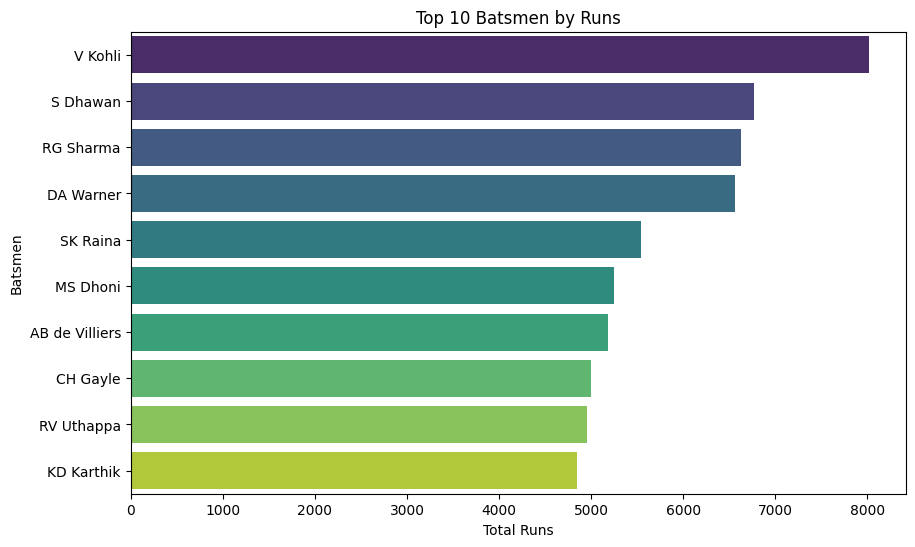

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='batsman_runs', y='batter', data=top_batsmen_sorted, palette='viridis')
plt.title('Top 10 Batsmen by Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.show()

In [ ]:
#Top Bowlers by Wickets
wickets_data = data_cleaned[data_cleaned['is_wicket'] == 1]
top_bowlers = wickets_data.groupby('bowler')['is_wicket'].count().reset_index()
top_bowlers_sorted = top_bowlers.sort_values(by='is_wicket', ascending=False).head(10)
print(top_bowlers_sorted)

         bowler  is_wicket
449   YS Chahal        213
104    DJ Bravo        207
301   PP Chawla        201
383   SP Narine        200
308    R Ashwin        198
63      B Kumar        195
376  SL Malinga        188
7      A Mishra        183
171   JJ Bumrah        182
323   RA Jadeja        169


<ipython-input-13-4ad4430ce652>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_wicket', y='bowler', data=top_bowlers_sorted, palette='magma')


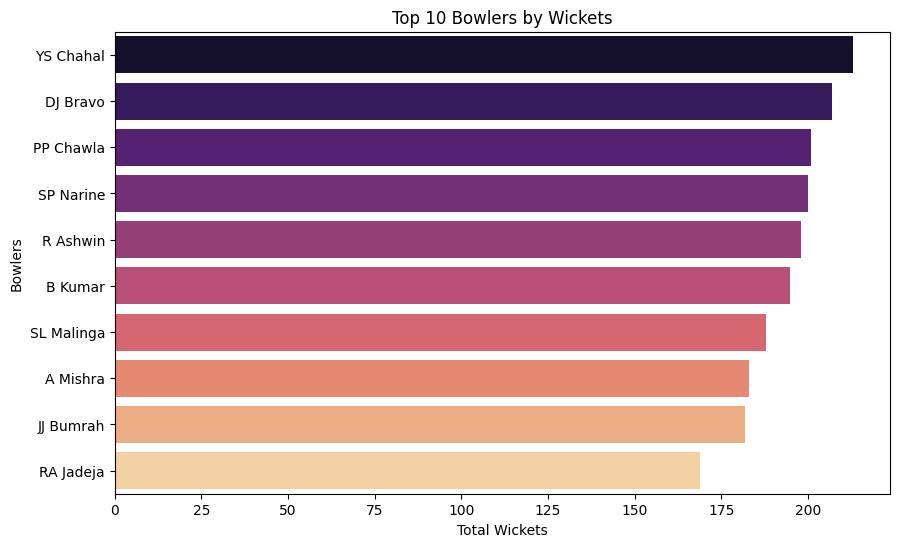

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='is_wicket', y='bowler', data=top_bowlers_sorted, palette='magma')
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Bowlers')
plt.show()

In [ ]:
#Run Distribution by Over
runs_by_over = data_cleaned.groupby('over')['total_runs'].sum().reset_index()
print(runs_by_over)

    over  total_runs
0      0       13651
1      1       16163
2      2       17895
3      3       18415
4      4       18565
5      5       18528
6      6       14839
7      7       15981
8      8       16639
9      9       16353
10    10       16779
11    11       17076
12    12       17205
13    13       17634
14    14       18149
15    15       18472
16    16       19012
17    17       19559
18    18       19076
19    19       17765


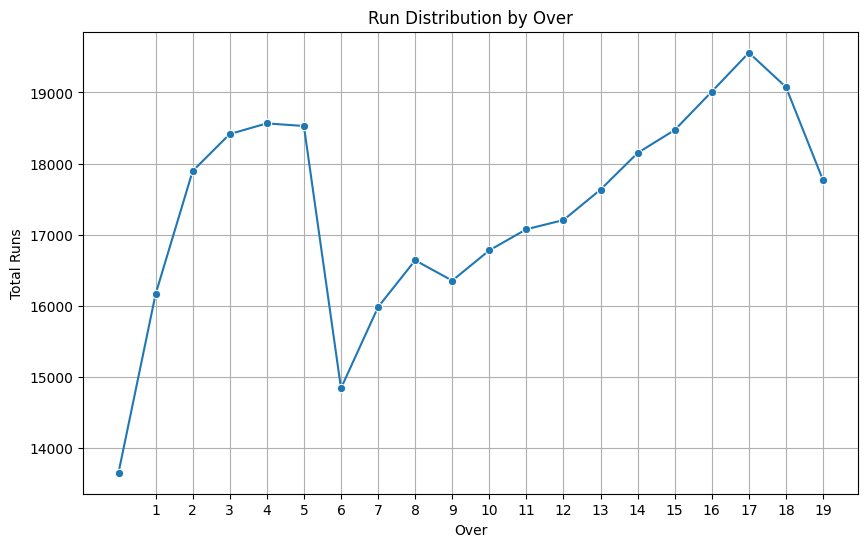

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='over', y='total_runs', data=runs_by_over, marker='o')
plt.title('Run Distribution by Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.xticks(range(1, max(runs_by_over['over'])+1))
plt.grid(True)
plt.show()

In [ ]:
#distribution of extras (wides, no balls,etc)
extras_breakdown = data_cleaned.groupby('extras_type')['extra_runs'].sum().reset_index()
print(extras_breakdown)

  extras_type  extra_runs
0        None           0
1        byes        1270
2     legbyes        5242
3     noballs        1104
4     penalty          12
5       wides       10064


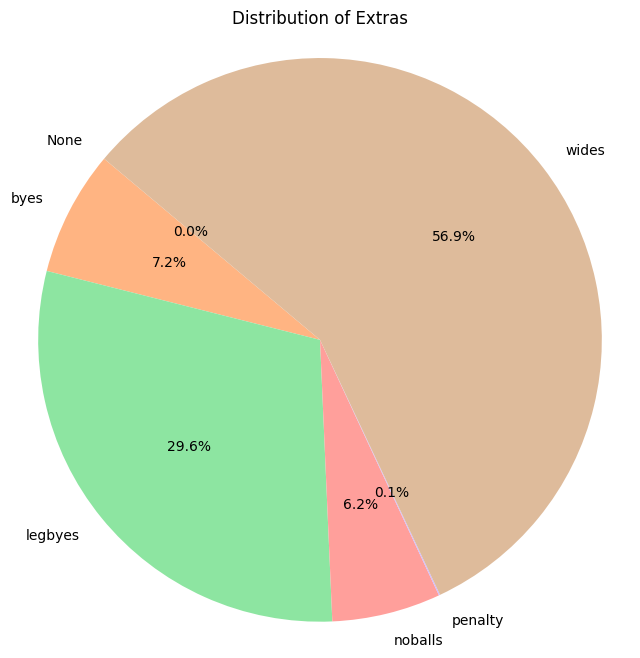

In [ ]:
plt.figure(figsize=(8,8))
extras_counts = extras_breakdown.set_index('extras_type')['extra_runs']
plt.pie(extras_counts, labels=extras_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Extras')
plt.axis('equal')
plt.show()

In [ ]:
#dismissals to see how wickets are taken
dismissal_types = data_cleaned[data_cleaned['is_wicket'] == 1].groupby('dismissal_kind')['is_wicket'].count().reset_index()
print(dismissal_types)

          dismissal_kind  is_wicket
0                 bowled       2212
1                 caught       8063
2      caught and bowled        367
3             hit wicket         15
4                    lbw        800
5  obstructing the field          3
6           retired hurt         15
7            retired out          3
8                run out       1114
9                stumped        358


<ipython-input-20-23210e0e04c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_wicket', y='dismissal_kind', data=dismissal_types, palette='coolwarm')


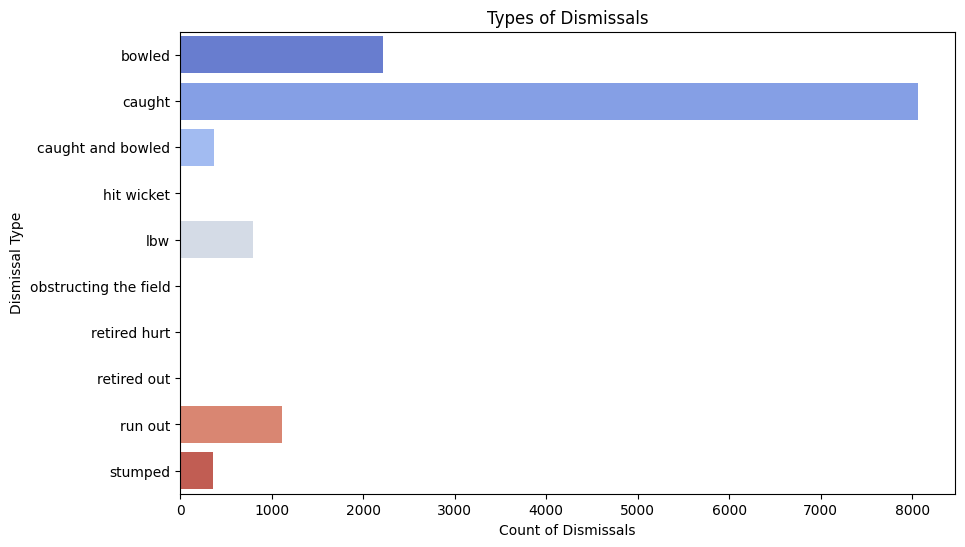

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='is_wicket', y='dismissal_kind', data=dismissal_types, palette='coolwarm')
plt.title('Types of Dismissals')
plt.xlabel('Count of Dismissals')
plt.ylabel('Dismissal Type')
plt.show()

In [ ]:
#Team Performance Comparison
team_performance = data_cleaned.groupby('batting_team')['total_runs'].sum().reset_index()
team_performance_sorted = team_performance.sort_values(by='total_runs', ascending=False)
print(team_performance_sorted)

                   batting_team  total_runs
10               Mumbai Indians       42176
8         Kolkata Knight Riders       39331
0           Chennai Super Kings       38629
16  Royal Challengers Bangalore       37692
13             Rajasthan Royals       34747
6               Kings XI Punjab       30064
18          Sunrisers Hyderabad       29071
3              Delhi Daredevils       24296
2                Delhi Capitals       14900
1               Deccan Chargers       11463
12                 Punjab Kings        9536
5                Gujarat Titans        7757
9          Lucknow Super Giants        7510
11                Pune Warriors        6358
4                 Gujarat Lions        4862
17  Royal Challengers Bengaluru        2930
14       Rising Pune Supergiant        2470
15      Rising Pune Supergiants        2063
7          Kochi Tuskers Kerala        1901


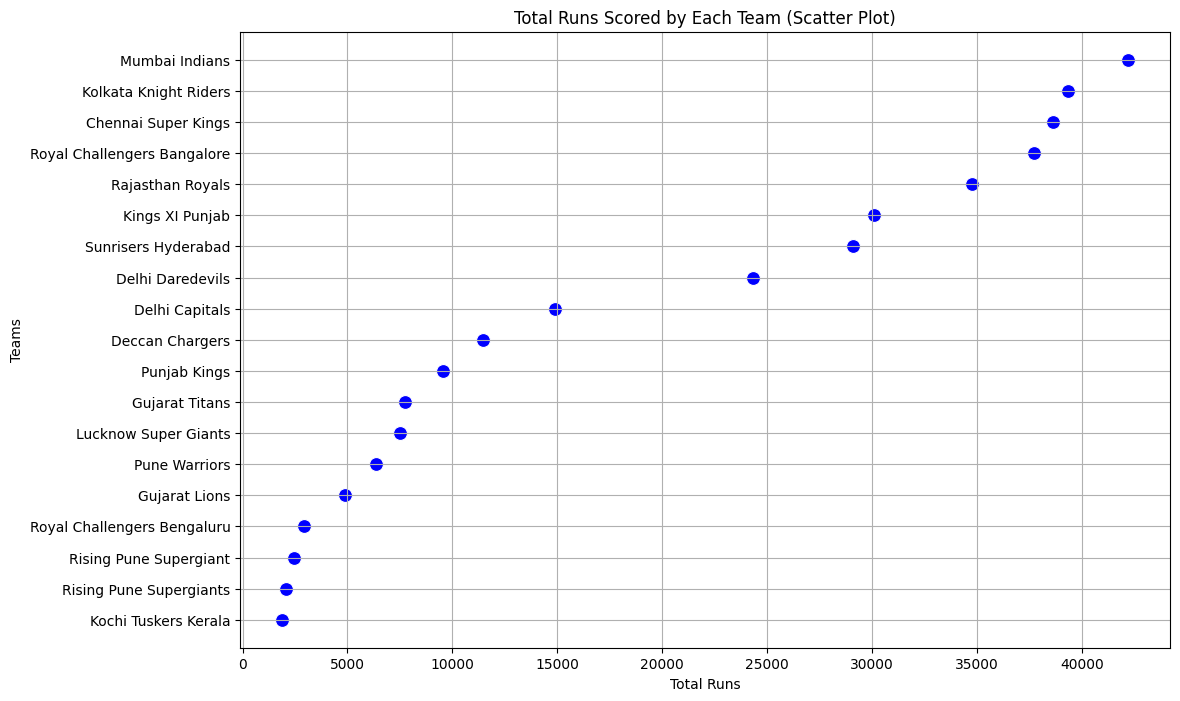

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_runs', y='batting_team', data=team_performance_sorted, s=100, color='blue')
plt.title('Total Runs Scored by Each Team (Scatter Plot)')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.grid(True)
plt.show()